In [1]:
!pip install datasets

In [2]:
import os
import pandas as pd

from datasets import load_dataset
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:


def load_datasets(basepath):
    """
    Load and clean individual fake news datasets from subfolders in basepath.
    Returns a dict of pandas DataFrames keyed by dataset name.
    """
    datasets = {}

    # 1. Aadya Singh_Fakenews: evaluation.csv, test (1).csv, train (2).csv
    folder = os.path.join(basepath, "Aadya Singh  _fake-and_real_news")
    files = ["evaluation.csv", "test (1).csv", "train (2).csv"]
    dfs = [pd.read_csv(os.path.join(folder, f), sep=';') for f in files]
    datasets['Aadya_Singh'] = pd.concat(dfs, ignore_index=True)

    # 2. Bhavik Jikadara - Fake News Detection
    folder = os.path.join(basepath, "Bhavik Jikadara - Fake News Detection")
    fake = pd.read_csv(os.path.join(folder, "fake.csv"))
    true = pd.read_csv(os.path.join(folder, "true.csv"))
    datasets['Bhavik_Jikadara'] = pd.concat([fake, true], ignore_index=True)

    # 3. clmentbisaillon_Fakenews
    folder = os.path.join(basepath, "clmentbisaillon_Fakenews")
    true = pd.read_csv(os.path.join(folder, "True.csv"))
    fake = pd.read_csv(os.path.join(folder, "Fake.csv"))
    df3 = pd.concat([true, fake], ignore_index=True)
    if 'text' in df3.columns:
        df3 = df3[df3['text'] != "[empty]"]
    datasets['clmentbisaillon'] = df3

    # 4. ErfanMoosaviMonazzah - fake-news-detection-dataset-English
    folder = os.path.join(basepath, "ErfanMoosaviMonazzah - fake-news-detection-dataset-English")
    parts = ["test.tsv", "train.tsv", "validation.tsv"]
    dfs = [pd.read_csv(os.path.join(folder, p), sep='\t') for p in parts]
    datasets['ErfanMoosaviMonazzah'] = pd.concat(dfs, ignore_index=True)

    # 5. GonzaloA - fake_news
    folder = os.path.join(basepath, "GonzaloA - fake_news")
    parts = ["test.csv", "train.csv", "evaluation.csv"]
    dfs = [pd.read_csv(os.path.join(folder, p), sep=';') for p in parts]
    datasets['GonzaloA'] = pd.concat(dfs, ignore_index=True)

    # 6. Hassan Amin - fake_or_real_news.csv
    datasets['Hassan_Amin'] = pd.read_csv(
        os.path.join(basepath, "Hassan Amin-fake_or_real_news.csv/fake_or_real_news.csv")
    )

    # 7. Meg Risdal_fake_only
    folder = os.path.join(basepath, "Meg Risdal_fake_only")
    df7 = pd.read_csv(os.path.join(folder, "fake.csv"))
    # Drop null titles and non-English
    if 'titel' in df7.columns:
        df7 = df7.dropna(subset=['titel'])
        df7 = df7.rename(columns={'titel': 'title'})
    if 'language' in df7.columns:
        df7 = df7[df7['language'].str.lower() == 'english']
    datasets['Meg_Risdal'] = df7

    # 8. Ruchi Bhatia_news_articles.csv
    df8 = pd.read_csv(os.path.join(basepath, "Ruchi Bhatia_news_articles.csv/news_articles.csv"))
    # Clean entries
    df8 = df8[~df8['title'].str.lower().isin(['no title', 'newsticker'])]
    df8 = df8[df8['text'].notna()]
    if 'language' in df8.columns:
        df8 = df8[df8['language'].str.lower() == 'english']
    datasets['Ruchi_Bhatia'] = df8

    # 9. Saurabh Shahane - Fake_News_Classification
    datasets['Saurabh_Shahane'] = pd.read_csv(
        os.path.join(basepath, "Saurabh Shahane - Fake_News_Classification", "WELFake_Dataset.csv")
    )

    # 10. andyP/fake_news_en_opensources
    df10 = pd.read_csv(
        os.path.join(basepath, "bigFakeNews", "opensources_fake_news_cleaned.csv")
    )
    df10 = df10[df10['type'].isin(['reliable', 'fake'])]
    datasets['andyP_opensources'] = df10

    return datasets

In [4]:
base_path = '../../data'
datasets = load_datasets(base_path)

for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} rows, {df.shape[1]} columns")

Aadya_Singh: 40587 rows, 4 columns
Bhavik_Jikadara: 44898 rows, 4 columns
clmentbisaillon: 44898 rows, 4 columns
ErfanMoosaviMonazzah: 44267 rows, 6 columns
GonzaloA: 40587 rows, 4 columns
Hassan_Amin: 6335 rows, 4 columns
Meg_Risdal: 12403 rows, 20 columns
Ruchi_Bhatia: 1786 rows, 12 columns
Saurabh_Shahane: 72134 rows, 4 columns
andyP_opensources: 2569501 rows, 8 columns


In [5]:
# Extract title sets from each DataFrame
title_sets = {}
for name, df in datasets.items():
    if 'title' in df.columns:
        title_sets[name] = set(df['title'].dropna().astype(str))
    else:
        title_sets[name] = set()

In [6]:
# Initialize result matrix
dataset_names = list(title_sets.keys())
result = pd.DataFrame(index=dataset_names,
                      columns=dataset_names,
                      dtype=float)

In [7]:
# Compute pairwise overlap percentages
for i, a in enumerate(dataset_names):
    for b in dataset_names[i+1:]:
        print("compute" + a + " " + b)
        set_a = title_sets[a]
        set_b = title_sets[b]
        score_ab = (len(set_a & set_b) / len(set_a) * 100) if set_a else 0.0
        score_ba = (len(set_b & set_a) / len(set_b) * 100) if set_b else 0.0
        result.loc[a, b] = score_ab
        result.loc[b, a] = score_ba

computeAadya_Singh Bhavik_Jikadara
computeAadya_Singh clmentbisaillon
computeAadya_Singh ErfanMoosaviMonazzah
computeAadya_Singh GonzaloA
computeAadya_Singh Hassan_Amin
computeAadya_Singh Meg_Risdal
computeAadya_Singh Ruchi_Bhatia
computeAadya_Singh Saurabh_Shahane
computeAadya_Singh andyP_opensources
computeBhavik_Jikadara clmentbisaillon
computeBhavik_Jikadara ErfanMoosaviMonazzah
computeBhavik_Jikadara GonzaloA
computeBhavik_Jikadara Hassan_Amin
computeBhavik_Jikadara Meg_Risdal
computeBhavik_Jikadara Ruchi_Bhatia
computeBhavik_Jikadara Saurabh_Shahane
computeBhavik_Jikadara andyP_opensources
computeclmentbisaillon ErfanMoosaviMonazzah
computeclmentbisaillon GonzaloA
computeclmentbisaillon Hassan_Amin
computeclmentbisaillon Meg_Risdal
computeclmentbisaillon Ruchi_Bhatia
computeclmentbisaillon Saurabh_Shahane
computeclmentbisaillon andyP_opensources
computeErfanMoosaviMonazzah GonzaloA
computeErfanMoosaviMonazzah Hassan_Amin
computeErfanMoosaviMonazzah Meg_Risdal
computeErfanMoosaviM

In [8]:
# Fill diagonal with 100%
for n in dataset_names:
    result.loc[n, n] = 100.0

result = result.round(2)

# Create annotations with percent and unmatched counts
annot = pd.DataFrame(index=dataset_names, columns=dataset_names)
for a in dataset_names:
    for b in dataset_names:
        if a == b:
            annot.loc[a, b] = "100%\n0"
        else:
            set_a = title_sets[a]
            set_b = title_sets[b]
            inter = set_a & set_b
            unmatched = len(set_a - set_b)
            annot.loc[a, b] = f"{result.loc[a,b]:.2f}%\n{unmatched}"

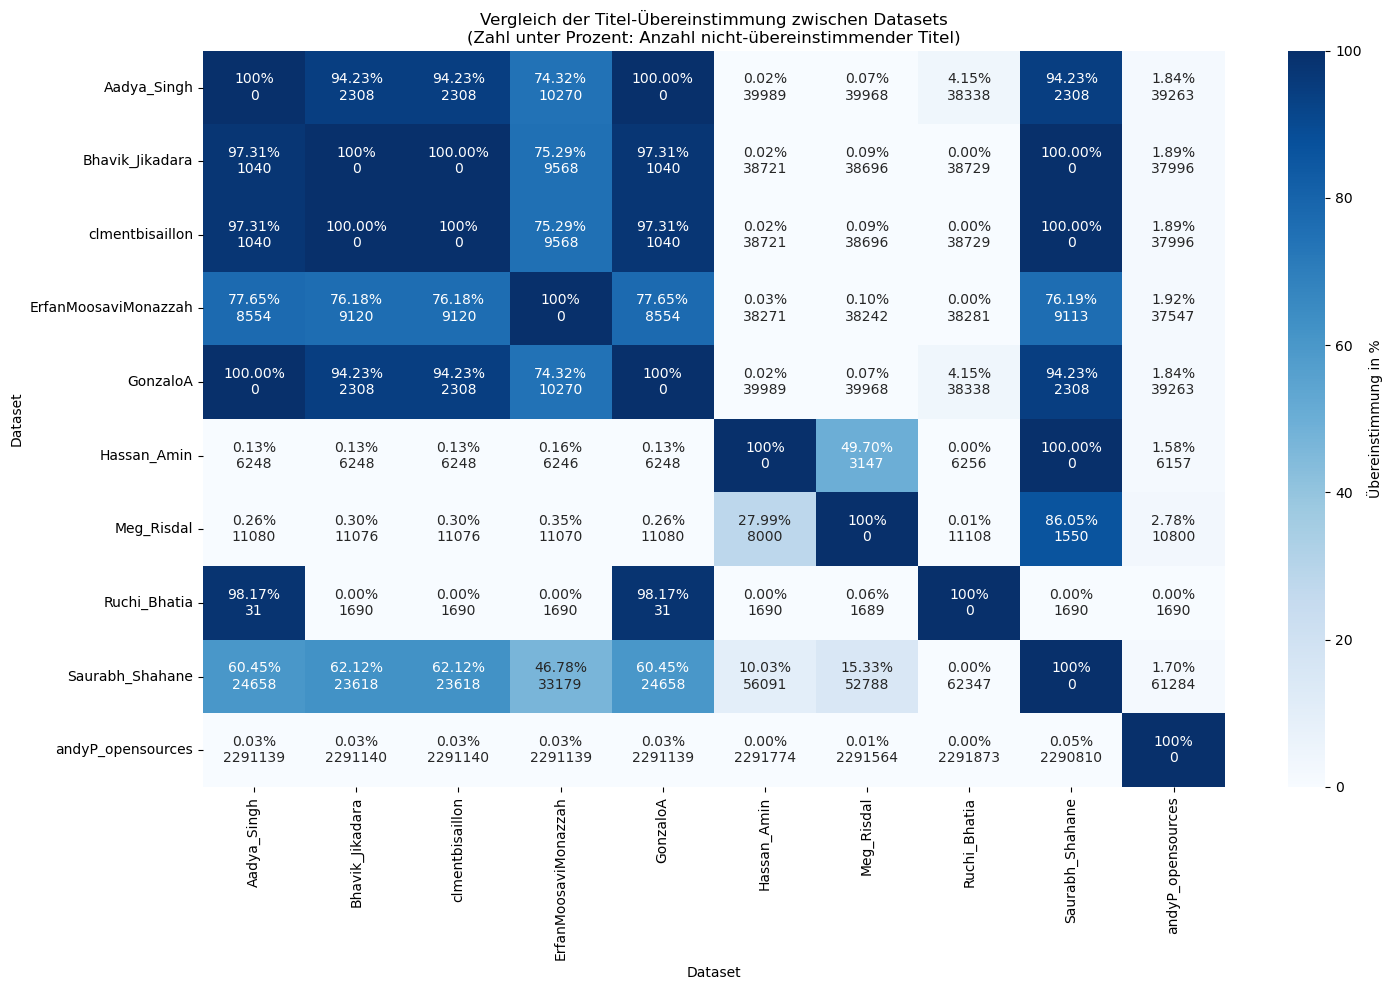

In [9]:
# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(result.astype(float), annot=annot.values, fmt="",
            cmap='Blues', cbar_kws={'label': 'Übereinstimmung in %'})
plt.title('Vergleich der Titel-Übereinstimmung zwischen Datasets\n'
          '(Zahl unter Prozent: Anzahl nicht-übereinstimmender Titel)')
plt.xlabel('Dataset')
plt.ylabel('Dataset')
plt.tight_layout()
plt.show()

